In [1]:
#importing Core-Libraries & Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#importing pre-processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#importing machine learning libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#performance metrics libraries
from sklearn.metrics import  classification_report
from sklearn.metrics import roc_curve, roc_auc_score


ModuleNotFoundError: No module named 'plotly'

*All libraries imported successfully*

In [4]:
#importing & reading dataset

data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


*Only first 5 rows of the dataset displayed*

In [3]:
#checking missing data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


*There is no missing values out of 918 rows in the dataset*

In [4]:
#checking data description

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**There is data irregularities**.
It is not possible for a living being to have:
*0 RestingBP*,
*0 Cholesterol*,
*0 FastingBS*

***Therefore, we need to perform EDA to understand the data in a better sense.***

**EXPLORATORY DATA ANALYSIS**

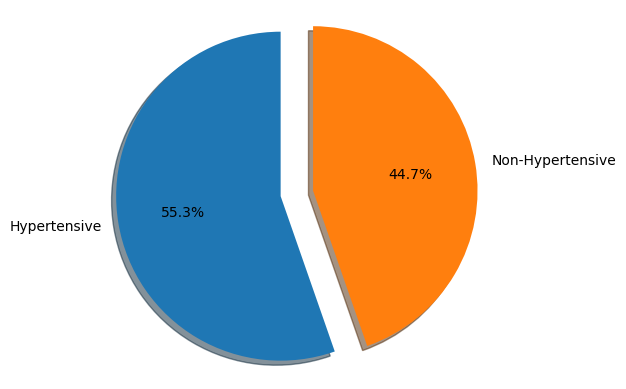

In [5]:
#percentage of heart disease

heart_counts = data['HeartDisease'].value_counts()
labels = 'Hypertensive', 'Non-Hypertensive'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(heart_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Morethan 55% of the patients in the dataset are heart disease (hypertensive)

In [6]:
#Checking the Distribution of Age

age_his = px.histogram(data, x='Age', marginal='box', color_discrete_sequence=['#C147E9'])
age_his.update_layout(title='Age Distribution')
age_his.show()

Distribution of Ages shown that most of the patient are between 42 - 65 Years of age.

In [7]:
#distribution of Age as per heart disease

cls = 'HeartDisease'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

age_hds = px.histogram(data, x='Age', color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
age_hds.show()

This is suggesting that the higher the ages of the patients, the higher the chances of having heart disease

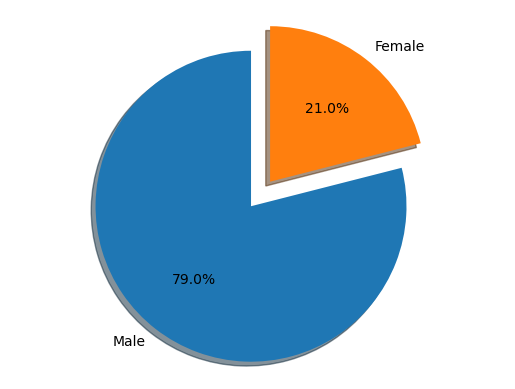

In [8]:
#distrubtion of sex

sex_counts = data['Sex'].value_counts()
labels = 'Male', 'Female'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(sex_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

About of 80% of the patients are male.

In [9]:
#sex distribution on heart disease

x='Sex'
cdm = {0:'#C147E9',1:'#F06292'}
clr='HeartDisease'

bar_sex_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
bar_sex_hd.show()

The output suggested that Male are more likely to have Heart Disease than Female

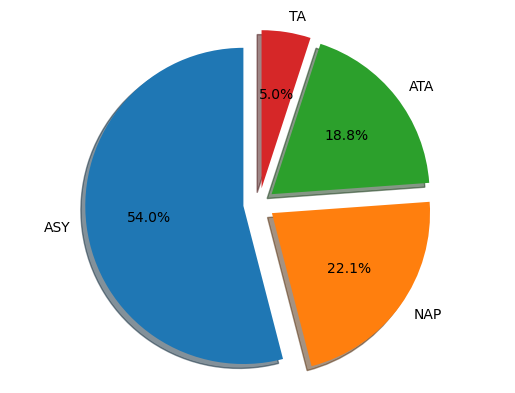

In [10]:
#percentage distrubtion of chest pain

chest_counts = data['ChestPainType'].value_counts()
labels = 'ASY', 'NAP', 'ATA', 'TA'
explode = (0.1,0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(chest_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Most of the patients are Asymptomatic with highest scores of 54%.

In [11]:
#chest pain type distribution on heart disease

x='ChestPainType'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

bar_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
bar_chest_hd.show()

This is indicating that majority of heart diseased patients are asymptomatic and having chest pain may not necessarily results to a heart disease or may not be due to a heart disease.

In [12]:
#Checking the Distribution of resting Blood Pressure

rbp_his = px.histogram(data, x='RestingBP', marginal='box', color_discrete_sequence=['#C147E9'])
rbp_his.update_layout(title='Resting Blood Pressure')
rbp_his.show()

Majority of the patients have a Resting Blood Pressure between 110 - 150

In [13]:
#distribution of RestingBP as per heart disease

cls = 'HeartDisease'
x = 'RestingBP'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

rbp_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
rbp_hds.show()

The distribution shown that patient with higher restingBP have more chances of heart disease.

In [14]:
#Checking the Distribution of Cholesterol

cls_his = px.histogram(data, x='Cholesterol', marginal='box', color_discrete_sequence=['#C147E9'] )
cls_his.update_layout(title='Cholesterol')
cls_his.show()

A number of patients have considerable high colesterol. There is huge outlier in this distribtion

In [15]:
#distribution of Cholesterol as per heart disease

cls = 'HeartDisease'
x = 'Cholesterol'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

cls_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
cls_hds.show()

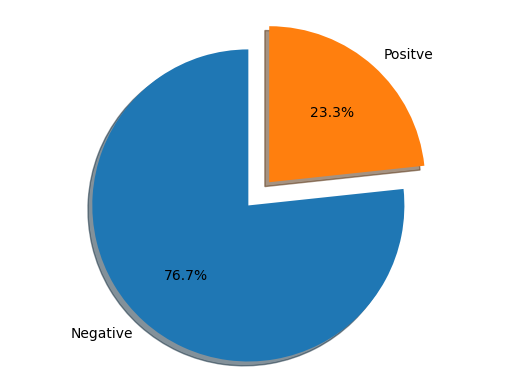

In [16]:
#percentage distrubtion of fasting blood sugar

fbs_counts = data['FastingBS'].value_counts()
labels = 'Negative', 'Positve'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

Only 23% of the patients have Fasting Blood Sugar

In [17]:
#Fasting Blood Sugar type distribution on heart disease

x='FastingBS'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Patients with Fasting Blood Sugar have a high chances of heart disease

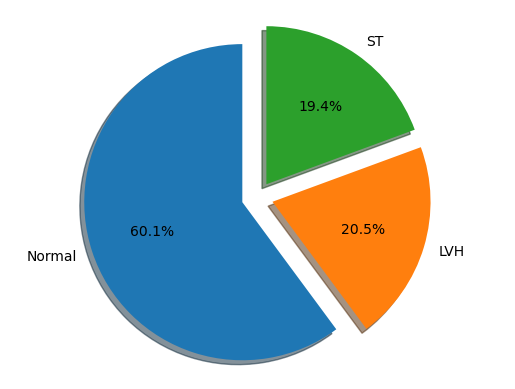

In [18]:
#percentage distrubtion of Resting ECG

fbs_counts = data['RestingECG'].value_counts()
labels = 'Normal', 'LVH', 'ST'
explode = (0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(fbs_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [19]:
#RestingECG Sugar type distribution on heart disease

x='RestingECG'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

fbs_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
fbs_chest_hd.show()

Have no clear information from this distribution.

In [20]:
#Checking the Distribution of MaxHR

mhr_his = px.histogram(data, x='MaxHR', marginal='box', color_discrete_sequence=['#C147E9'] )
mhr_his.update_layout(title='Max HR')
mhr_his.show()

In [21]:
#distribution of MaxHR as per heart disease

cls = 'HeartDisease'
x = 'MaxHR'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

mhr_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
mhr_hds.show()

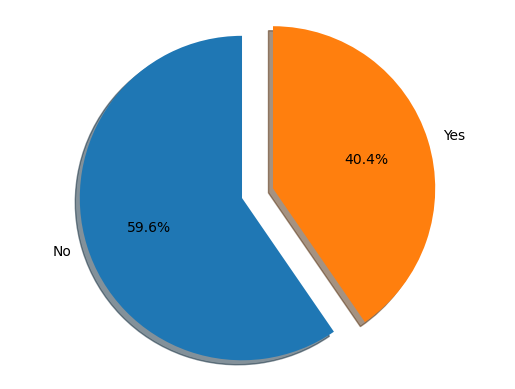

In [22]:
#percentage distrubtion of Exercise Agina

exg_counts = data['ExerciseAngina'].value_counts()
labels = 'No', 'Yes'
explode = (0.1,0.1)

ax = plt.subplot()
ax.pie(exg_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [23]:
#ExerciseAngina type distribution on heart disease

x='ExerciseAngina'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

exg_chest_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
exg_chest_hd.show()

Patients with Angina are more likely to have heart disease, than those without.

In [24]:
#Checking the Distribution of Oldpeak

olp_his = px.histogram(data, x='Oldpeak', marginal='box', color_discrete_sequence=['#C147E9'] )
olp_his.update_layout(title='Oldpeak')
olp_his.show()

In [25]:
#distribution of MaxHR as per heart disease

cls = 'HeartDisease'
x = 'Oldpeak'
mrg = 'box'
hst = 'density'
cdm = {0:'#C147E9',1:'#F06292'}

olp_hds = px.histogram(data, x=x, color=cls, marginal=mrg, histnorm=hst, color_discrete_map=cdm)
olp_hds.show()

Patients with oldPeak of 1.0 and above, have higher chances of heart disease

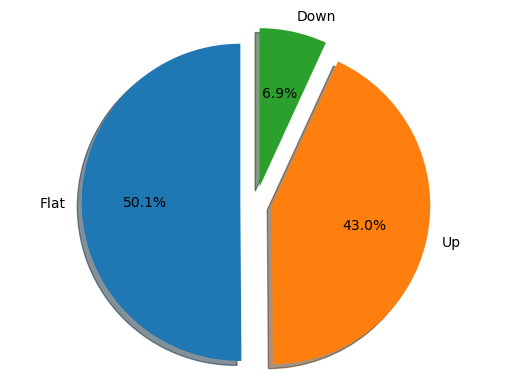

In [26]:
#percentage distrubtion of ST_Slope

sts_counts = data['ST_Slope'].value_counts()
labels = 'Flat', 'Up', 'Down'
explode = (0.1,0.1,0.1)

ax = plt.subplot()
ax.pie(sts_counts, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

In [27]:
#ST_Slope type distribution on heart disease

x='ST_Slope'
clr='HeartDisease'
cdm = {0:'#C147E9',1:'#F06292'}

sts_hd = px.histogram(data, x=x,color=clr, barmode='group', color_discrete_map=cdm)
sts_hd.show()

Patient with flat and down-slopping are more likely to have heart disease than patient with up-slopping

In [28]:
#voerall data distribtion

data_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
check = go.Figure()
for i in data_columns:
    check.add_trace(go.Box(y=data[i], name=i))
check.show() 

Age and MaxHR are the only perfect candidate here without outliers. RestingBP, Cholesterol and Oldpeak have significant outliers but may be meaningful to the predictions based on the nature of the dataset. However, all the three (3) variables have some inputs with zero (0) which rendered them invalid because, the values cannot be zero (0). Therefore, all the rows with zero (0) data will be removed!!!.

**DATA PRE-PROCESSING**

In [29]:
data = data[data['RestingBP'] != 0]
data = data[data['Cholesterol'] != 0]
#data = data[data['Oldpeak'] != 0]

In [30]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Since morethan half of Oldpeak data have zero (0). Removing the values may significantly affect the performance of the machine learning. So it was left.

In [31]:
#Chaning strings to numeric for Scaling

#for sex
sex_c = []

for value in data.Sex.values:
    if value == 'M':
        sex_c.append(1)
    else:
        sex_c.append(0)

data['Sex'] = sex_c

#for Chestpain
chest = []

for value in data.ChestPainType.values:
    if value == 'ATA':
        chest.append(1)
    elif value == 'TA':
        chest.append(2)
    elif value == 'NAP':
        chest.append(3)
    else:
        chest.append(4)

data['ChestPainType'] = chest

#restingECG
ecg = []

for value in data.RestingECG.values:
    if value == 'ST':
        ecg.append(1)
    elif value == 'LVH':
        ecg.append(2)
    else:
        ecg.append(3)

data['RestingECG'] = ecg

#for excercise agina
exg = []

for value in data.ExerciseAngina.values:
    if value == 'Y':
        exg.append(1)
    else:
        exg.append(0)

data['ExerciseAngina'] = exg

#for ST_Slope
slope = []

for value in data.ST_Slope.values:
    if value == 'Up':
        slope.append(1)
    elif value == 'Flat':
        slope.append(2)
    else:
        slope.append(3)

data['ST_Slope'] = slope
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,3,172,0,0.0,1,0
1,49,0,3,160,180,0,3,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,3,108,1,1.5,2,1
4,54,1,3,150,195,0,3,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,2,110,264,0,3,132,0,1.2,2,1
914,68,1,4,144,193,1,3,141,0,3.4,2,1
915,57,1,4,130,131,0,3,115,1,1.2,2,1
916,57,0,1,130,236,0,2,174,0,0.0,2,1


In [32]:
#declaring dependent and indepndent variables

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [33]:
#preprocessing with standardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
#splitting data into training and testing sets

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Machine Learning**

In [35]:
#training with K-Nearest Nieghboors
kn_classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
kn_classifier.fit(X_train,y_train)

#training with Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#training with Naive Bayes
nb_classifier=GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

**PERFORMANCE EVALUATION**

In [36]:
#Predictions Performance Scores

kn_score = kn_classifier.score(X_test, y_test)
dt_score = dt_classifier.score(X_test, y_test)
nb_score = nb_classifier.score(X_test, y_test)

print('---------Prediction Scores------')

print('K-Nearest Classifier Prediction Score is', kn_score*100,'%')
print('Decision Tree Classifier Prediction Score is', dt_score*100,'%')
print('Naive Bayes Prediction Score is', nb_score*100,'%')

---------Prediction Scores------
K-Nearest Classifier Prediction Score is 89.33333333333333 %
Decision Tree Classifier Prediction Score is 83.33333333333334 %
Naive Bayes Prediction Score is 86.66666666666667 %


*All the algorithms have a very good performance of above 80% but K-Nearest has outperformed the rest with 4.0% and 2.7% respectively.*

In [37]:
#determining the precision,recall and f1-score
ykn = kn_classifier.predict(X_test)
ydt = dt_classifier.predict(X_test)
ynb = nb_classifier.predict(X_test)

KN_report=classification_report(y_test,ykn)
DT_report=classification_report(y_test, ydt)
NB_report=classification_report(y_test,ynb)

In [38]:
print('K-Nearest Classifier Report:')
print(KN_report)

K-Nearest Classifier Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        71
           1       0.91      0.89      0.90        79

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [39]:
print('Decision Tree Classifier Report:')
print(DT_report)

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        71
           1       0.86      0.82      0.84        79

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [40]:
print('Naive Bayes Classifier Report:')
print(NB_report)

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        71
           1       0.89      0.85      0.87        79

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [41]:
#ROC Curve
kn_score = kn_classifier.predict_proba(X_test)[:,1]
dt_score = dt_classifier.predict_proba(X_test)[:,1]
nb_score = nb_classifier.predict_proba(X_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, kn_score)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, dt_score)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, nb_score)

print('roc_auc_score for K-Nearest Neighbors: ', roc_auc_score(y_test, kn_score))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, dt_score))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, nb_score))

roc_auc_score for K-Nearest Neighbors:  0.9400962738456053
roc_auc_score for DecisionTree:  0.8339276163308967
roc_auc_score for Naive Bayes:  0.9424139775361027


KNN and NB have similar ROC Score.

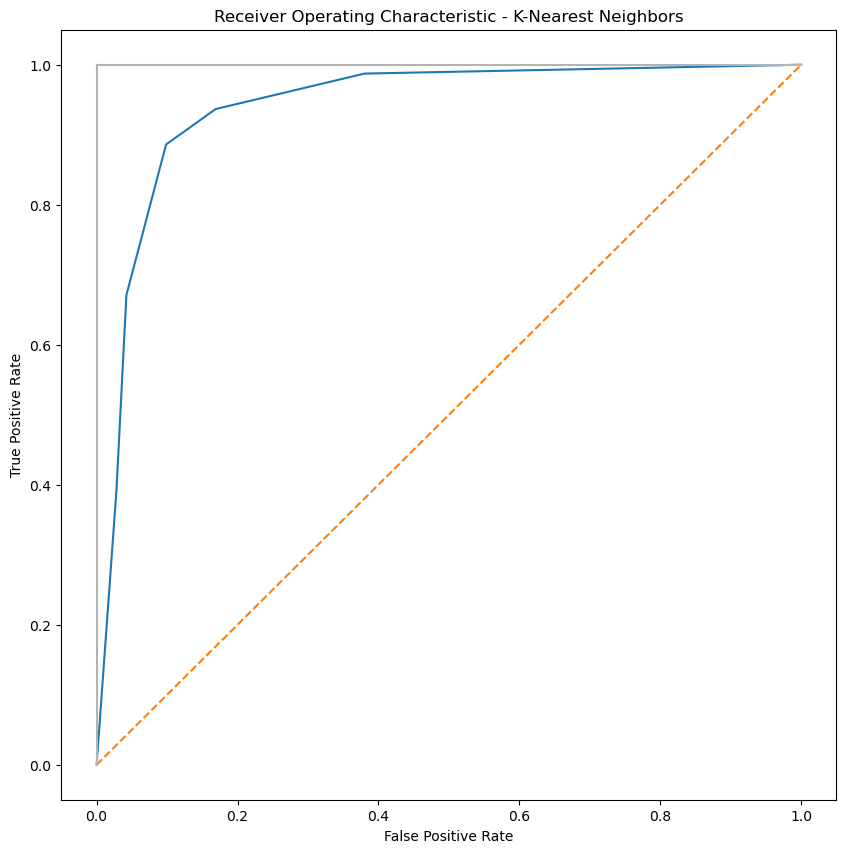

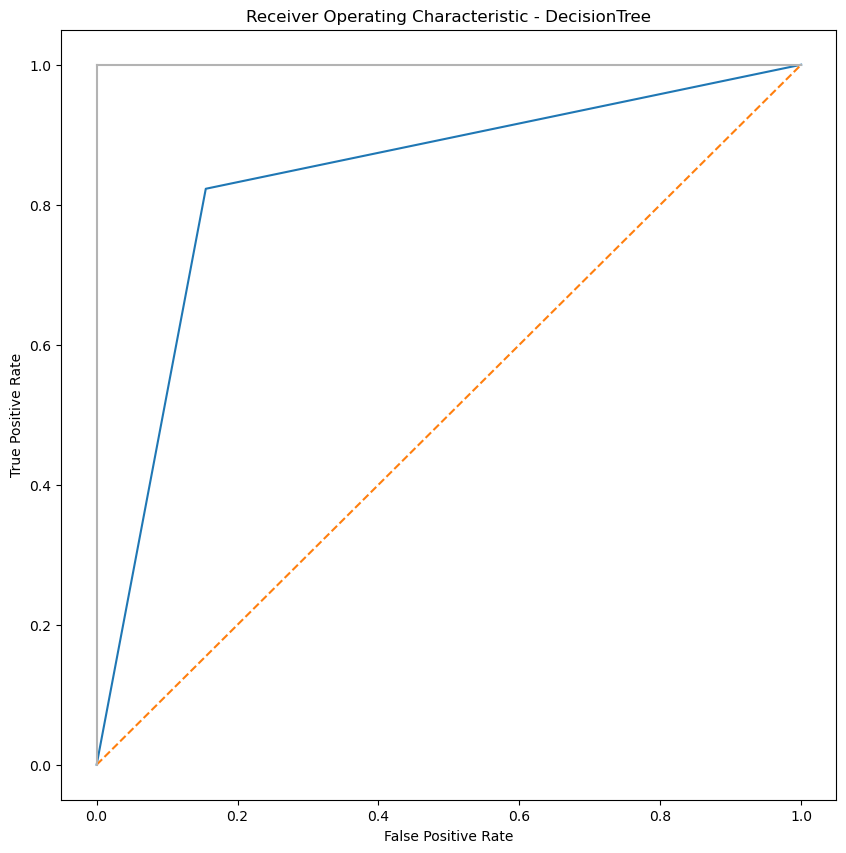

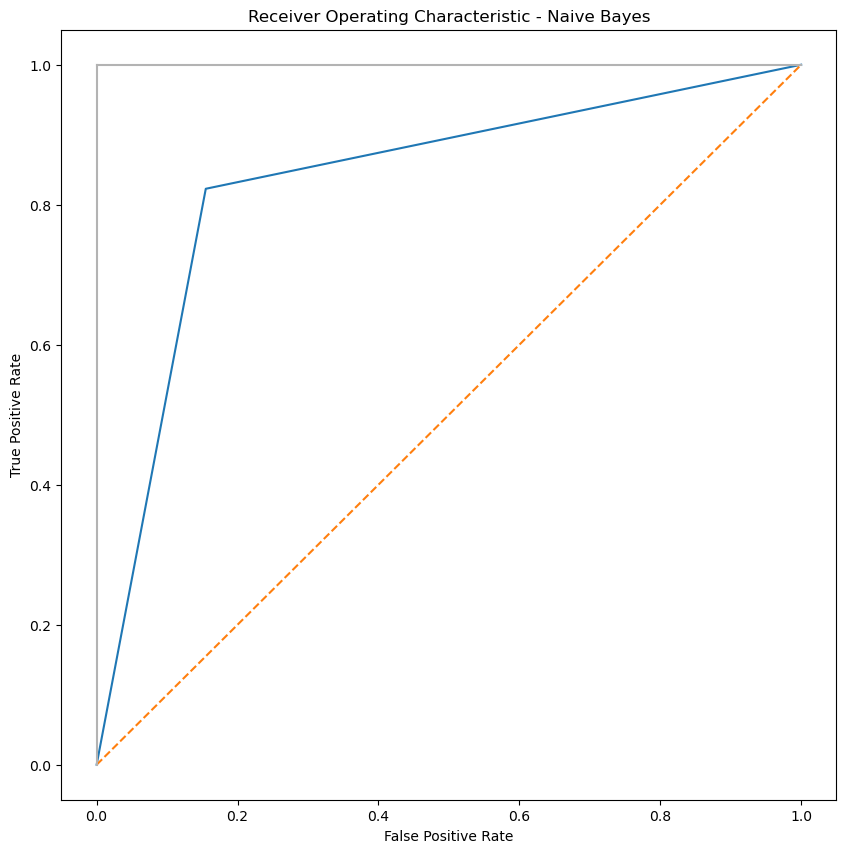

In [42]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - K-Nearest Neighbors')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

All the algorithms have a very strong positive rates. Though KNN has outperformed the rest.